### Visualize random samples

Don't forget to update all paths

In [13]:
import json, random, time, os, base64
import numpy as np
from pprint import pprint
from collections import Counter, defaultdict
import cv2
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

In [3]:
txt_dataset = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/txt_dataset_0823_clean_te.json", "r"))
img_dataset = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/img_dataset_0901_remine_des_shorter_truncate.json", "r"))

print(Counter([txt_dataset[k]['split'] for k in txt_dataset]))
print(len(set([txt_dataset[k]['Guid'] for k in txt_dataset])))

print(Counter([img_dataset[k]['split'] for k in img_dataset]))
print(Counter([img_dataset[k]['Qcate'] for k in img_dataset]))
print(Counter([img_dataset[k]['Qcate'] for k in img_dataset if img_dataset[k]['split'] == 'test']))
print(len(set([img_dataset[k]['Guid'] for k in img_dataset])))

Counter({'train': 17812, 'test': 4076, 'val': 2455})
24343
Counter({'train': 16448, 'test': 3464, 'val': 2511})
Counter({'YesNo': 7430, 'Others': 5823, 'choose': 4693, 'number': 2084, 'color': 1832, 'shape': 561})
Counter({'Others': 1058, 'choose': 981, 'YesNo': 935, 'color': 228, 'number': 200, 'shape': 62})
22423


In [11]:
### Load img files' lineidx
img_lineidx = {}

# positive images for img-based queries
with open("/data/yingshac/MMMHQA/base64/gold_img.lineidx", "r") as fp:
    lineidx = [int(i.strip()) for i in fp.readlines()]
    print(len(lineidx))
    img_lineidx[0] = lineidx
# negative images for img-based queries
with open("/data/yingshac/MMMHQA/base64/neg_img.lineidx", "r") as fp:
    lineidx = [int(i.strip()) for i in fp.readlines()]
    print(len(lineidx))
    img_lineidx[1] = lineidx
# negative images for txt-based queries
with open("/data/yingshac/MMMHQA/base64/x_neg_img.lineidx", "r") as fp:
    lineidx = [int(i.strip()) for i in fp.readlines()]
    print(len(lineidx))
    img_lineidx[2] = lineidx

### img tsv files; paths
img_tsv = {0: "/data/yingshac/MMMHQA/base64/gold_img.tsv",
          1: "/data/yingshac/MMMHQA/base64/neg_img.tsv", 
          2: "/data/yingshac/MMMHQA/base64/x_neg_img.tsv"}

22265
340194
240700


In [36]:
### Txt-based queries
show_distractors = False


k = random.choice(list(txt_dataset.keys()))

print(k)
print("Q = ", txt_dataset[k]['Q'])
print("\nA =")
pprint(txt_dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for f in txt_dataset[k]['txt_posFacts']:
    print(f['fact'])
    print(f['url'])

if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in txt_dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])

8982
Q =  SPN is an example of what thing 11mi west of downtown Belgrade near the suburb of Surčin?

A =
['Airport']

------ Positive Evidence ------ 
It is the largest and busiest airport in Serbia, situated 18 km (11 mi) west of downtown Belgrade near the suburb of Surčin, surrounded by Syrmia 's fertile lowlands. It is operated by French conglomerate Vinci Airports and it is named after Serbian–American inventor Nikola Tesla .
https://en.wikipedia.org/wiki/Belgrade_Nikola_Tesla_Airport
Saipan International Airport ( IATA: SPN, ICAO: PGSN, FAA LID: GSN ), also known as Francisco C. Ada/Saipan International Airport, is a public airport located on Saipan Island in the United States Commonwealth of the Northern Mariana Islands.
https://en.wikipedia.org/wiki/Saipan_International_Airport


21868
Q =  "What pattern do the colored lines above the marquee for the Castro Theater form?"

A =
['"The colored lines above the marquee for the Castro Theater form a zigzag '
 'pattern."']

------ Positive Evidence ------ 
00013526 {"image_id": 13526}
https://commons.wikimedia.org/wiki/File:Castro_Theatre%2C_San_Francisco.jpg
Caption =  Castro Theatre, San Francisco The Castro Theatre in San Francisco.


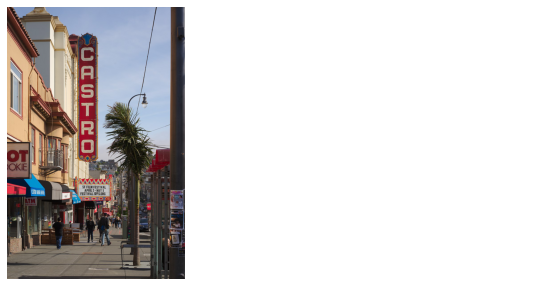

In [33]:
### Image-based queries
show_distractors = False
Qcate = ['color', 'shape', 'number', 'choose', 'YesNo', 'Others']


while True:
    k = random.choice(list(img_dataset.keys()))
    if img_dataset[k]['Qcate'] in Qcate:
        break
print(k)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
print("Q = ", img_dataset[k]['Q'])
print("\nA =")
pprint(img_dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for ax, f in zip(axes.ravel(), img_dataset[k]['img_posFacts']):
    image_id = f['image_id']
    with open(img_tsv[int(image_id)//10000000], "r") as fp:
        fp.seek(img_lineidx[int(image_id)//10000000][int(image_id)%10000000])
        _, imgid, img_base64 = fp.readline().strip().split('\t')
    print(image_id, imgid) # image_id in dataset file and image_id in img file should agree
    im = cv2.imdecode(np.frombuffer(base64.b64decode(img_base64), dtype=np.uint8), cv2.IMREAD_COLOR)
    ax.imshow(im[:,:,::-1])
    ax.axis('off')
    print(f['url'])
    print("Caption = ", f['caption'])
axes.ravel()[-1].axis('off') # hide the second plot if there is only one positive img
if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in img_dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])
    for f in img_dataset[k]['txt_negFacts']:
        print(f['fact'])